In [ ]:
#Ex 5 ML Coursera

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
from sklearn import svm
import scipy.io
from scipy.optimize import fmin_cg
from plotnine import *

In [30]:
####=========== Part 1: Loading and Visualizing Data =============


##Loading data and create basis vars
data = scipy.io.loadmat('ex5data1.mat')
X = pd.DataFrame(data["X"])
y = pd.DataFrame(data["y"])
Xval = pd.DataFrame(data["Xval"])
yval = pd.DataFrame(data["yval"])
Xtest = pd.DataFrame(data["Xtest"])
ytest = pd.DataFrame(data["ytest"])

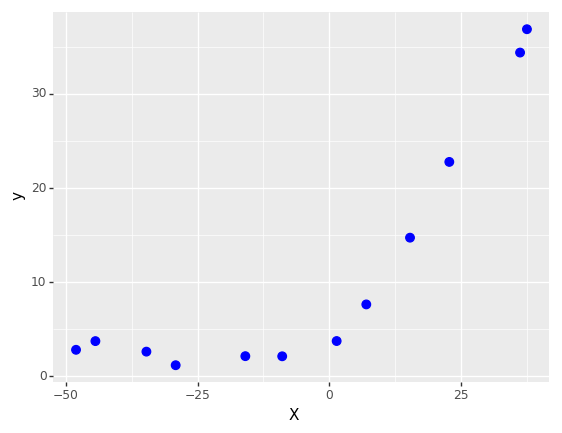

<ggplot: (-9223363250266740764)>

In [31]:
#Visualization of data
#plt.scatter(X,y)
#plotDF = pd.concat([X,y], axis= 1)
#plotDF.columns=["X","y"]
#plotDF

fig = (
    ggplot(X)+geom_point(aes(x="X",y ="y"), color = "blue", size = 3)
)
fig

In [15]:
Xn = X
Xnval = Xval
theta = np.array([1,1])

In [17]:
Xn.insert(0,"x0",1)
Xnval.insert(0,"x0",1)

In [18]:
#=========== Part 2: Regularized Linear Regression Cost =============
linearRegCostFunction_J(Xn, y, 1)(theta)
#=========== Part 3: Regularized Linear Regression Gradient =============
linearRegCostFunction_G(Xn, y, 1)(theta)
#=========== Part 4: Train Linear Regression =============
thetas_lg=trainLinearReg(Xn, y, 1) 

Optimization terminated successfully.
         Current function value: 22.379542
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


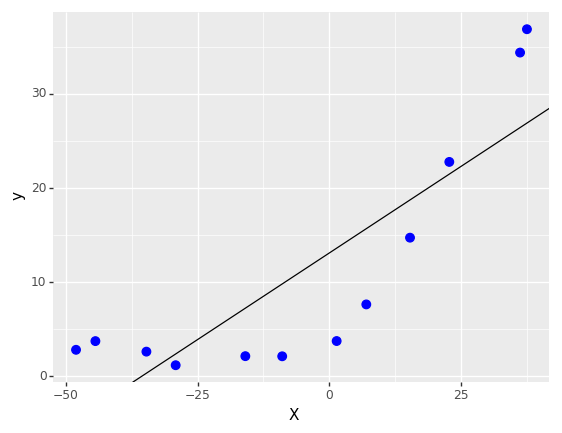

<ggplot: (-9223363250269426460)>

In [138]:
fig+geom_abline(slope = thetas_lg[1], intercept = thetas_lg[0])

In [139]:
##=========== Part 5: Learning Curve for Linear Regression =============
DFLearningCurve=learningCurve(Xn, y, Xnval, yval, 1)
DFLearningCurve=pd.concat([DFLearningCurve, pd.DataFrame(np.array(range(0,len(DFLearningCurve))))], axis = 1)
DFLearningCurve.columns=["error_train", "error_val","m"]
DFLearningCurve=DFLearningCurve.iloc[1:]
DFLearningCurve

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.001307
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.335017
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.881847
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.174273
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.461396
         Iterations: 22
         Function evaluations: 34
        

,error_train,error_val,m
1,0,138,1
2,0,110,2
3,3,44,3
4,2,48,4
5,13,35,5
6,19,33,6
7,20,31,7
8,18,30,8
9,22,31,9
10,23,28,10


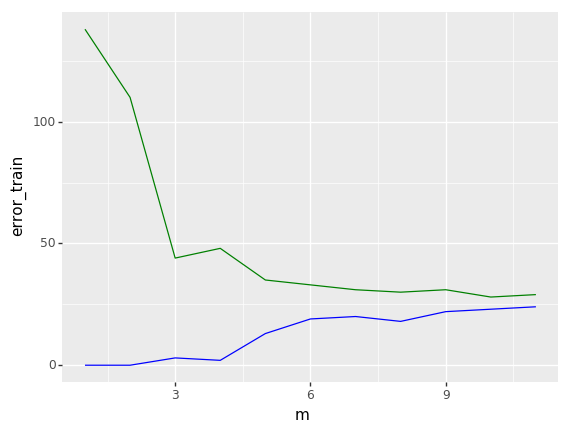

<ggplot: (-9223363250268928508)>

In [20]:
plotLearningCurve = (
    ggplot(DFLearningCurve)+
    geom_line(aes(x="m", y = "error_train"), color = "blue")+
    geom_line(aes(x="m", y = "error_val"), color = "green")
)
plotLearningCurve

In [140]:
 #%% =========== Part 6: Feature Mapping for Polynomial Regression =============
p=8
X_poly=polyFeatures(X,8)
from sklearn.preprocessing import scale
X_poly = pd.DataFrame(scale(X_poly))
X_poly.insert(0,"x0",1)
X_poly

/home/lucariel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


,x0,0,1,2,3,4,5,6,7
0,1,-0.378244,-0.788662,0.190329,-0.737591,0.320252,-0.617152,0.359835,-0.531091
1,1,-0.838920,0.001314,-0.258962,-0.341565,0.097549,-0.455197,0.266773,-0.468874
2,1,1.438717,0.610832,1.305341,0.256220,1.021863,-0.012696,0.790210,-0.177927
3,1,1.484123,0.738068,1.420312,0.413122,1.155348,0.131224,0.910700,-0.062290
4,1,-1.497919,1.936440,-2.127747,2.435101,-2.518767,2.717922,-2.763317,2.889082
5,1,-0.134409,-1.019366,0.262563,-0.772578,0.331047,-0.621454,0.361189,-0.531587
6,1,0.710844,-0.814714,0.355803,-0.743368,0.341028,-0.618105,0.362252,-0.531229
7,1,-1.032490,0.471428,-0.628018,0.097049,-0.228188,-0.147905,0.041156,-0.278551
8,1,0.225684,-1.122793,0.278115,-0.776424,0.331682,-0.621592,0.361213,-0.531591
9,1,-1.369818,1.486072,-1.616960,1.559802,-1.583314,1.450403,-1.429150,1.278576


In [141]:
X_poly_test=polyFeatures(Xtest,p)
X_poly_test = pd.DataFrame(scale(X_poly_test))

X_poly_test.insert(0,"x0",1)
X_poly_test

/home/lucariel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


,x0,0,1,2,3,4,5,6,7
0,1,-0.952585,0.203719,-0.414537,-0.163333,-0.013451,-0.298036,0.170834,-0.326104
1,1,-1.104788,0.577915,-0.716271,0.176222,-0.266424,-0.077639,0.010941,-0.201164
2,1,-1.545241,1.932731,-2.091325,2.135346,-2.124783,1.994907,-1.923627,1.753133
3,1,-0.051939,-1.022641,0.218963,-0.664701,0.265203,-0.486291,0.279603,-0.395110
4,1,0.855611,-0.548749,0.388587,-0.582045,0.294753,-0.473587,0.284291,-0.393213
5,1,-1.184544,0.793269,-0.906787,0.411191,-0.458073,0.104967,-0.133792,-0.077732
6,1,-0.330525,-0.823850,0.169940,-0.647064,0.260848,-0.484997,0.279276,-0.395019
7,1,1.229930,0.146601,0.817874,-0.207489,0.513671,-0.322324,0.372186,-0.337711
8,1,0.594954,-0.860523,0.264348,-0.652170,0.268187,-0.485504,0.279789,-0.395063
9,1,1.615896,1.169302,1.712246,0.890750,1.411722,0.541259,1.067365,0.268034


In [142]:
Xval_poly= polyFeatures(Xval, p)
Xval_poly= pd.DataFrame(scale(Xval_poly))
Xval_poly.insert(0,"x0",1)
Xval_poly

/home/lucariel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


,x0,0,1,2,3,4,5,6,7
0,1,-0.424161,-0.753116,0.127536,-0.736940,0.245527,-0.634134,0.266987,-0.553105
1,1,-0.350790,-0.836831,0.158743,-0.754889,0.251765,-0.637030,0.267970,-0.553515
2,1,1.309835,0.369222,1.021857,-0.018489,0.721820,-0.246305,0.518457,-0.354379
3,1,-1.447853,1.624282,-1.808682,1.838194,-1.915802,1.869067,-1.903938,1.806646
4,1,1.393025,0.585857,1.205946,0.222582,0.912351,-0.045384,0.673137,-0.207994
5,1,-1.233939,0.940957,-1.095441,0.689403,-0.797593,0.414921,-0.521651,0.189337
6,1,-0.008963,-1.074021,0.217464,-0.778875,0.257980,-0.639258,0.268569,-0.553717
7,1,1.039832,-0.231201,0.583848,-0.513461,0.382520,-0.558161,0.308215,-0.529405
8,1,-1.305365,1.158160,-1.310936,1.018821,-1.101461,0.788844,-0.857503,0.560099
9,1,1.000609,-0.305361,0.538102,-0.556937,0.357588,-0.577233,0.297566,-0.536712


In [143]:
#=========== Part 7: Learning Curve for Polynomial Regression =============
Xn_poly=X_poly
#Xn_poly.insert(0,"x0",1)
theta_poly=trainLinearReg(Xn_poly, y, 1)
yhat=theta_poly*Xn_poly
#x0    134.611092
yhat=np.sum(yhat, axis = 1)

Optimization terminated successfully.
         Current function value: 6.830463
         Iterations: 34
         Function evaluations: 62
         Gradient evaluations: 62


/home/lucariel/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


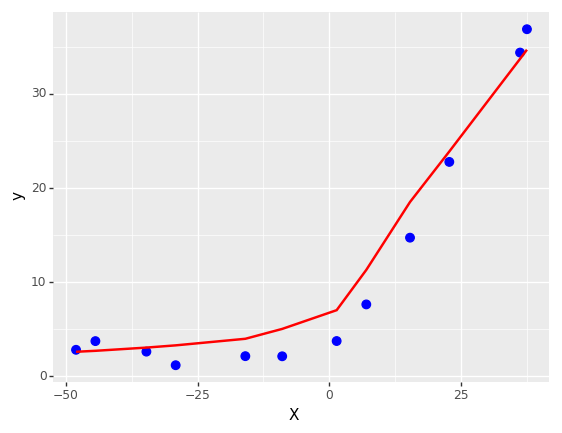

<ggplot: (8786585165846)>

In [144]:
fig+geom_smooth(aes(x="X",y ="yhat"), color = "red", size = 1)

In [145]:
##=========== Part 7: Learning Curve for Polynomial Regression =============
DFLearningCurve=learningCurve(X_poly, y, Xval_poly, yval, 1)
DFLearningCurve=pd.concat([DFLearningCurve, pd.DataFrame(np.array(range(0,len(DFLearningCurve))))], axis = 1)
DFLearningCurve.columns=["error_train", "error_val","m"]
DFLearningCurve=DFLearningCurve.iloc[1:]
DFLearningCurve

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.070327
         Iterations: 20
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 17.182727
         Iterations: 22
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 13.476899
         Iterations: 17
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 10.781524
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 9.347014
         Iterations: 31
         Function evaluations: 52
   

,error_train,error_val,m
1,0,138,1
2,0,143,2
3,17,9,3
4,13,8,4
5,10,8,5
6,9,10,6
7,8,8,7
8,7,7,8
9,7,8,9
10,6,8,10


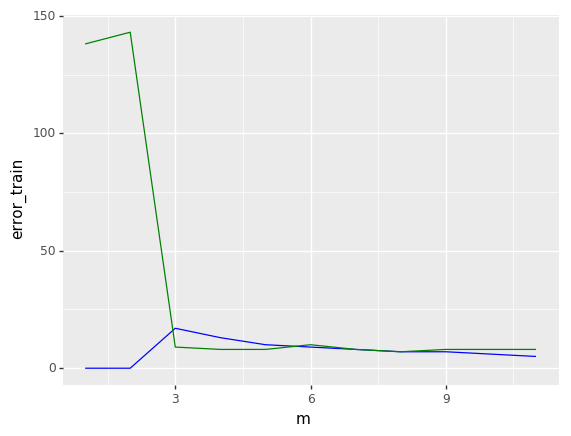

<ggplot: (8786585220577)>

In [146]:
plotLearningCurve = (
    ggplot(DFLearningCurve)+
    geom_line(aes(x="m", y = "error_train"), color = "blue")+
    geom_line(aes(x="m", y = "error_val"), color = "green")
)
plotLearningCurve

In [147]:
# =========== Part 8: Validation for Selecting Lambda =============
sel_lambda=validationCurve(X_poly, y,Xval_poly,yval)
sel_lambda.columns=["error_train", "error_val", "lambda"]

Optimization terminated successfully.
         Current function value: 0.028901
         Iterations: 415
         Function evaluations: 846
         Gradient evaluations: 846
Optimization terminated successfully.
         Current function value: 0.169418
         Iterations: 64
         Function evaluations: 142
         Gradient evaluations: 142
Optimization terminated successfully.
         Current function value: 0.243172
         Iterations: 121
         Function evaluations: 245
         Gradient evaluations: 245
Optimization terminated successfully.
         Current function value: 0.371282
         Iterations: 63
         Function evaluations: 129
         Gradient evaluations: 129
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 70
         Function evaluations: 134
         Gradient evaluations: 134
Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 74
         Function evalua

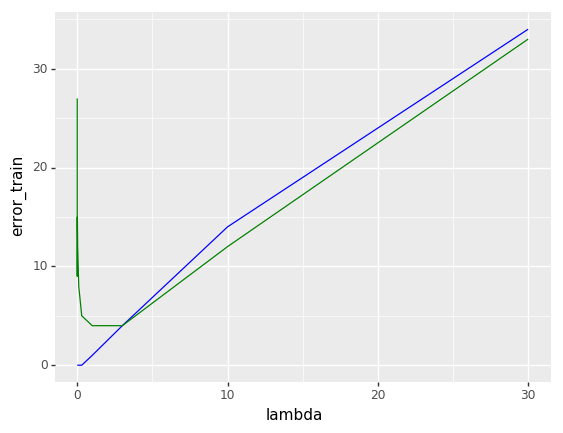

<ggplot: (8786585214433)>

In [149]:
sel_lambda
plotLearningCurve = (
    ggplot(sel_lambda)+
    geom_line(aes(x="lambda", y = "error_train"), color = "blue")+
    geom_line(aes(x="lambda", y = "error_val"), color = "green")
)
plotLearningCurve

In [124]:
#==============Appendix = Necessary Functions =========================
def linearRegCostFunction_J(X, y, l):
    def J_func(theta):
        m = len(X)
        sqrErrors = np.square(np.dot(X,theta)-np.array(y).ravel())
        J = (1/(2*m))*sum(sqrErrors)
        theta_reg = np.array(theta)
        theta_reg = np.square(theta_reg)
        theta_reg[0]=0
        theta_reg = sum(theta_reg)
        reg = (l/(2*m))*theta_reg
        J = J+reg
        return(J)
    return J_func

def linearRegCostFunction_G(X,y,l):
    def grad_func(theta):
        m = len(X)
        theta_reg = np.array(theta)
        theta_reg[0] = 0
        error = np.dot(X,theta)-np.array(y).ravel()
        grad = (1/m)*np.dot(np.transpose(error),X)+(l/m)*theta_reg
        return grad
    return grad_func

def trainLinearReg(X,y,l):
    incostFunction=linearRegCostFunction_J(X, y, l)
    ingradFunction=linearRegCostFunction_G(X, y, l)
    init_theta = np.repeat(0, X.shape[1])
    opt = fmin_cg(incostFunction, init_theta,ingradFunction)
    return opt




def learningCurve(X, y, Xval, yval, l):
    m = X.shape[0]
    error_train = np.repeat(0, m)
    error_val = np.repeat(0, m)
    for i in range(1,m):
        X_train = X.iloc[0:i]
        y_train = y.iloc[0:i]
        theta_tr=trainLinearReg(X_train,y_train,l)
        error_train[i]=linearRegCostFunction_J(X_train,y_train,l)(theta_tr)
        error_val[i]=linearRegCostFunction_J(Xval,yval,l)(theta_tr)
    rta = pd.concat([pd.DataFrame(error_train),pd.DataFrame(error_val)], axis = 1)
    rta.columns=["error_train", "error_val"]
    return(rta)


def polyFeatures(X,p):
    X_poly=X
    for i in range(2,(p+1)):
        X_poly = pd.concat([X_poly,pd.DataFrame(np.power(X,i))], 1)
    return X_poly



def validationCurve(Xc, yc, Xvalc, yvalc):
    lambda_vec = np.array([0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30])
    m = len(lambda_vec)
    error_train = np.repeat(0, m)
    error_val = np.repeat(0, m)
    for i in range(0,m):
        l = lambda_vec[i]
        theta_tr = trainLinearReg(Xc,yc,l)
        error_train[i]=linearRegCostFunction_J(Xc,yc,0)(theta_tr)
        error_val[i]=linearRegCostFunction_J(Xvalc,yvalc,0)(theta_tr)
        
        
    errors=pd.concat([pd.DataFrame(error_train),pd.DataFrame(error_val), pd.DataFrame(lambda_vec)], axis = 1)
    return(errors)

lambda          Train Error     Validation Error
 0.000000       0.135983        12.802883
 0.001000       0.159316        19.556951
 0.003000       0.172414        16.940457
 0.010000       0.221525        17.008673
 0.030000       0.281853        12.828896
 0.100000       0.459318        7.587013
 0.300000       0.921760        4.636833
 1.000000       2.076188        4.260625
 3.000000       4.901351        3.822907
 10.000000      16.092213       9.945508